In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/SEK-11/dataset_excelR/main/DATA/crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.drop(columns = "Unnamed: 0", inplace = True)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [4]:
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [5]:
df.duplicated().sum()

0

<Axes: >

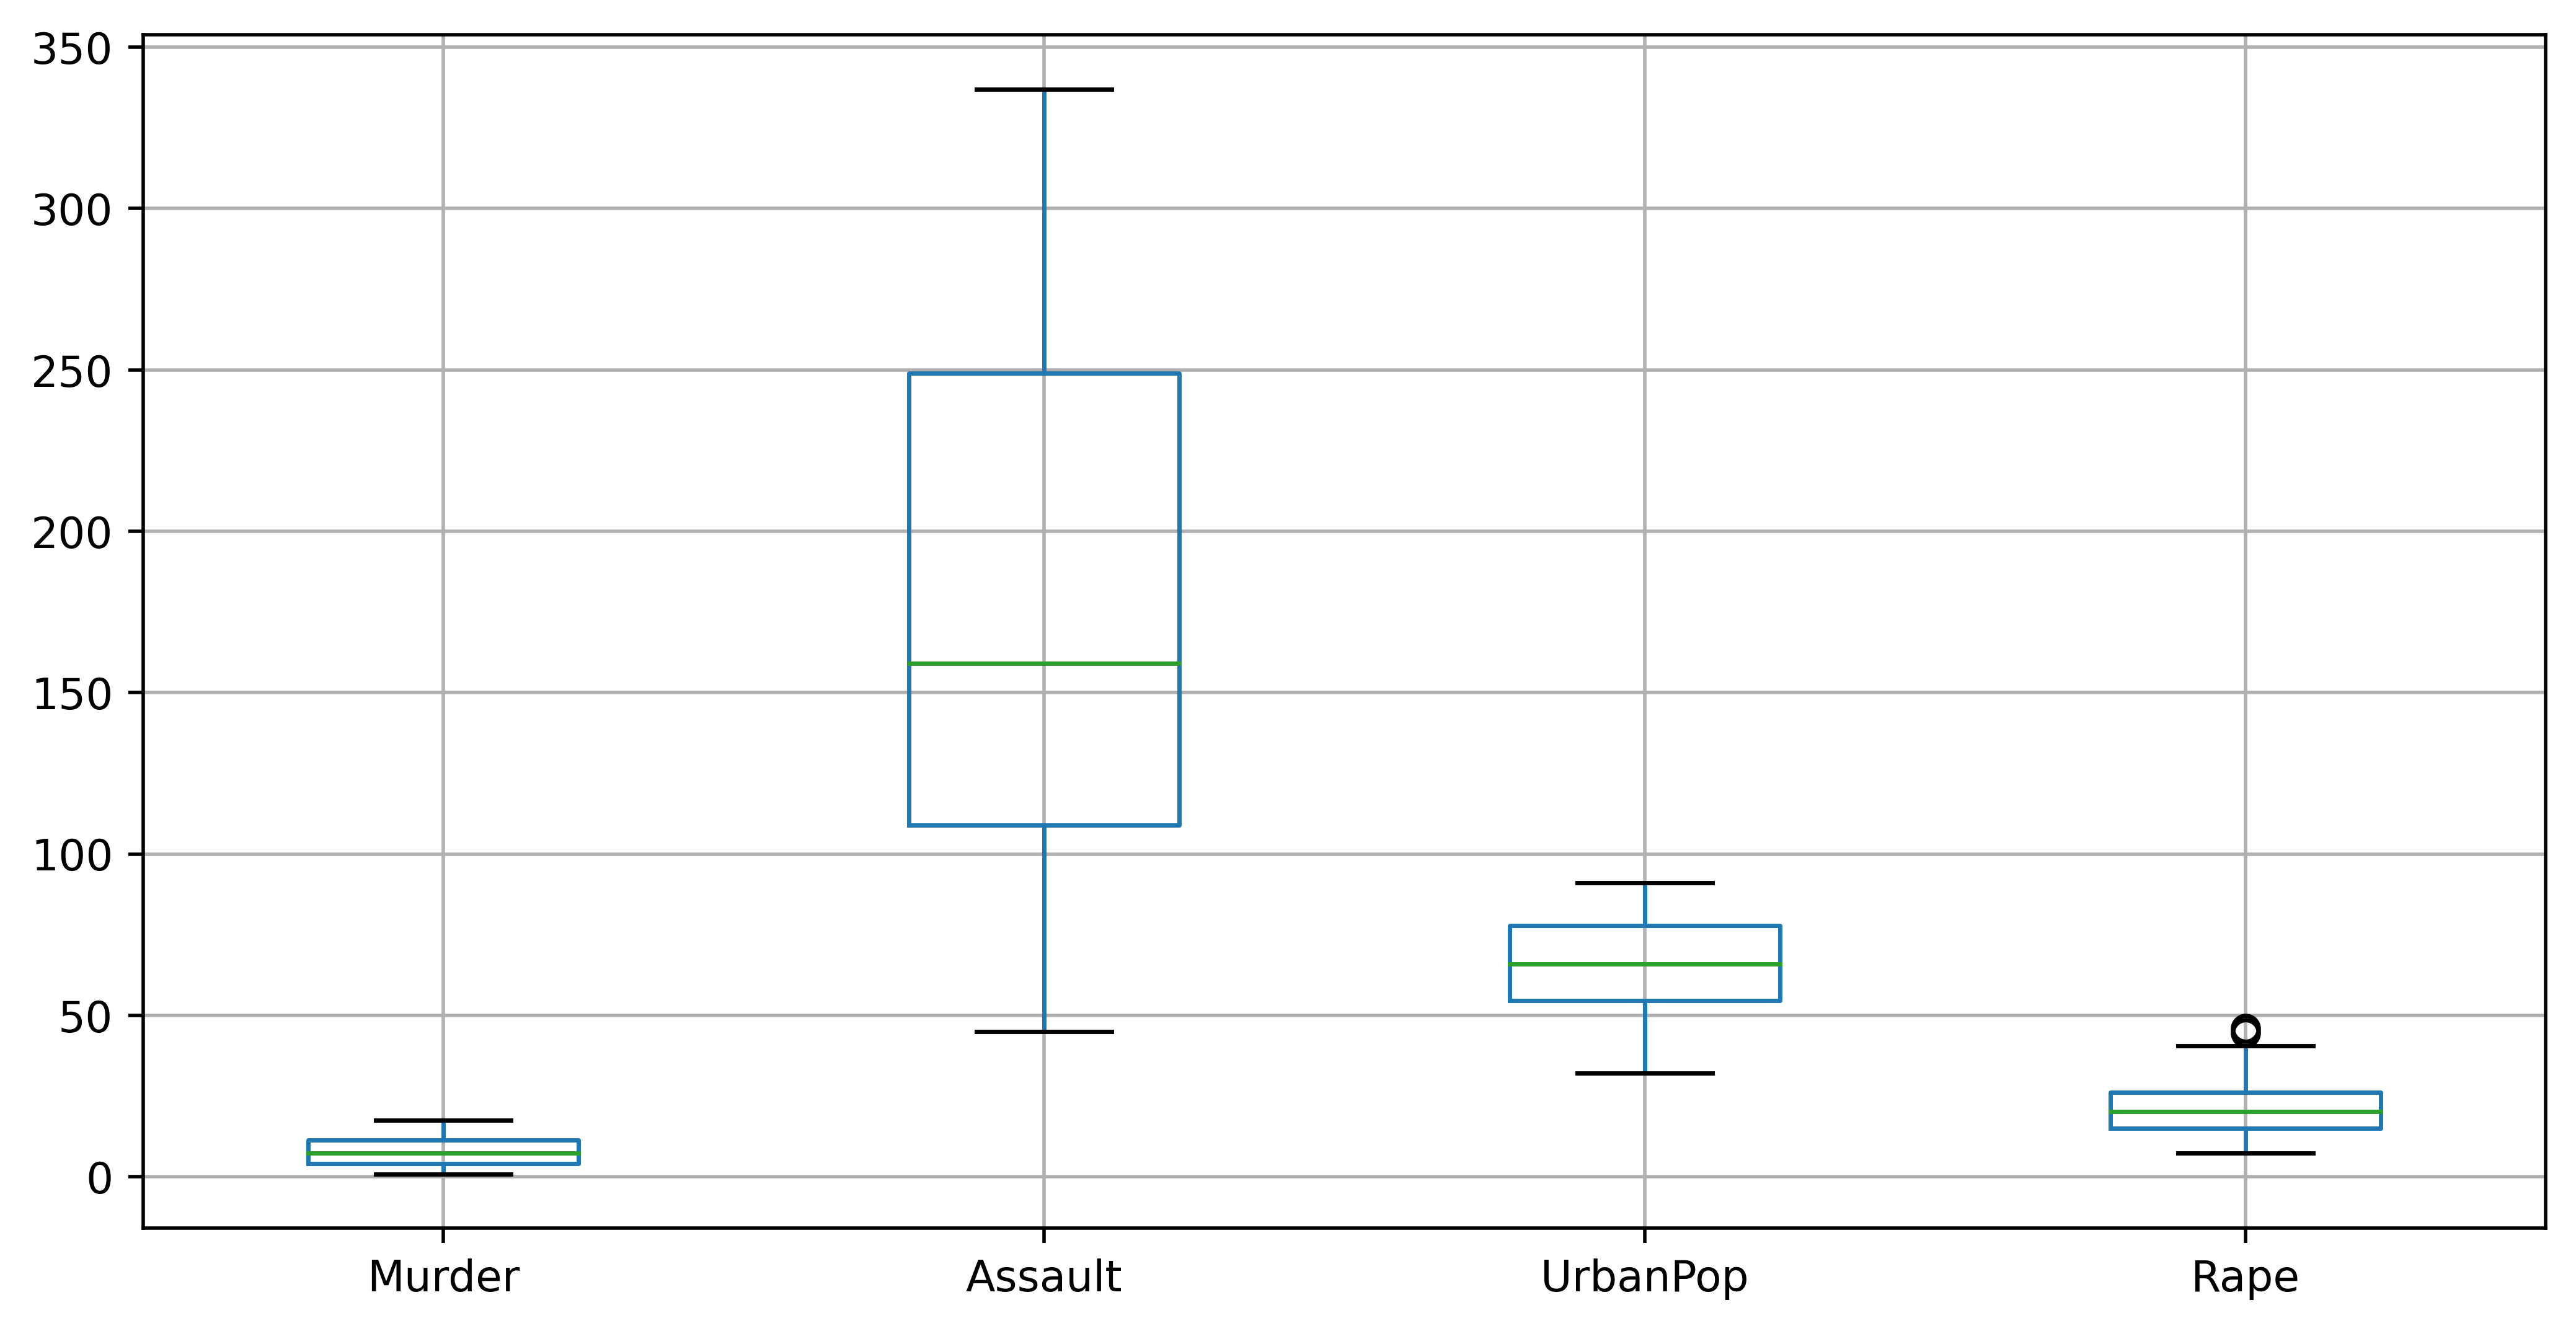

In [6]:
df.boxplot()

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
km = KMeans()
ypred = km.fit_predict(x)
ypred

array([3, 7, 5, 0, 2, 2, 1, 1, 5, 3, 1, 6, 5, 0, 6, 0, 0, 3, 4, 5, 1, 5,
       6, 3, 5, 0, 6, 2, 6, 1, 5, 5, 3, 4, 1, 0, 1, 1, 1, 3, 4, 3, 5, 1,
       4, 0, 1, 4, 6, 0])

In [11]:
silhouette_score(x,ypred)

0.25979746831065414

In [12]:
wcss = []

for i in range(1,10):
  km = KMeans(n_clusters= i)
  ypred = km.fit_predict(x)
  wcss.append(km.inertia_)

wcss

[200.0,
 104.96163315756871,
 80.08569526137275,
 57.55425863091104,
 50.10617286461217,
 44.0140955825632,
 39.416695844516966,
 35.44517211562288,
 30.616017585613793]

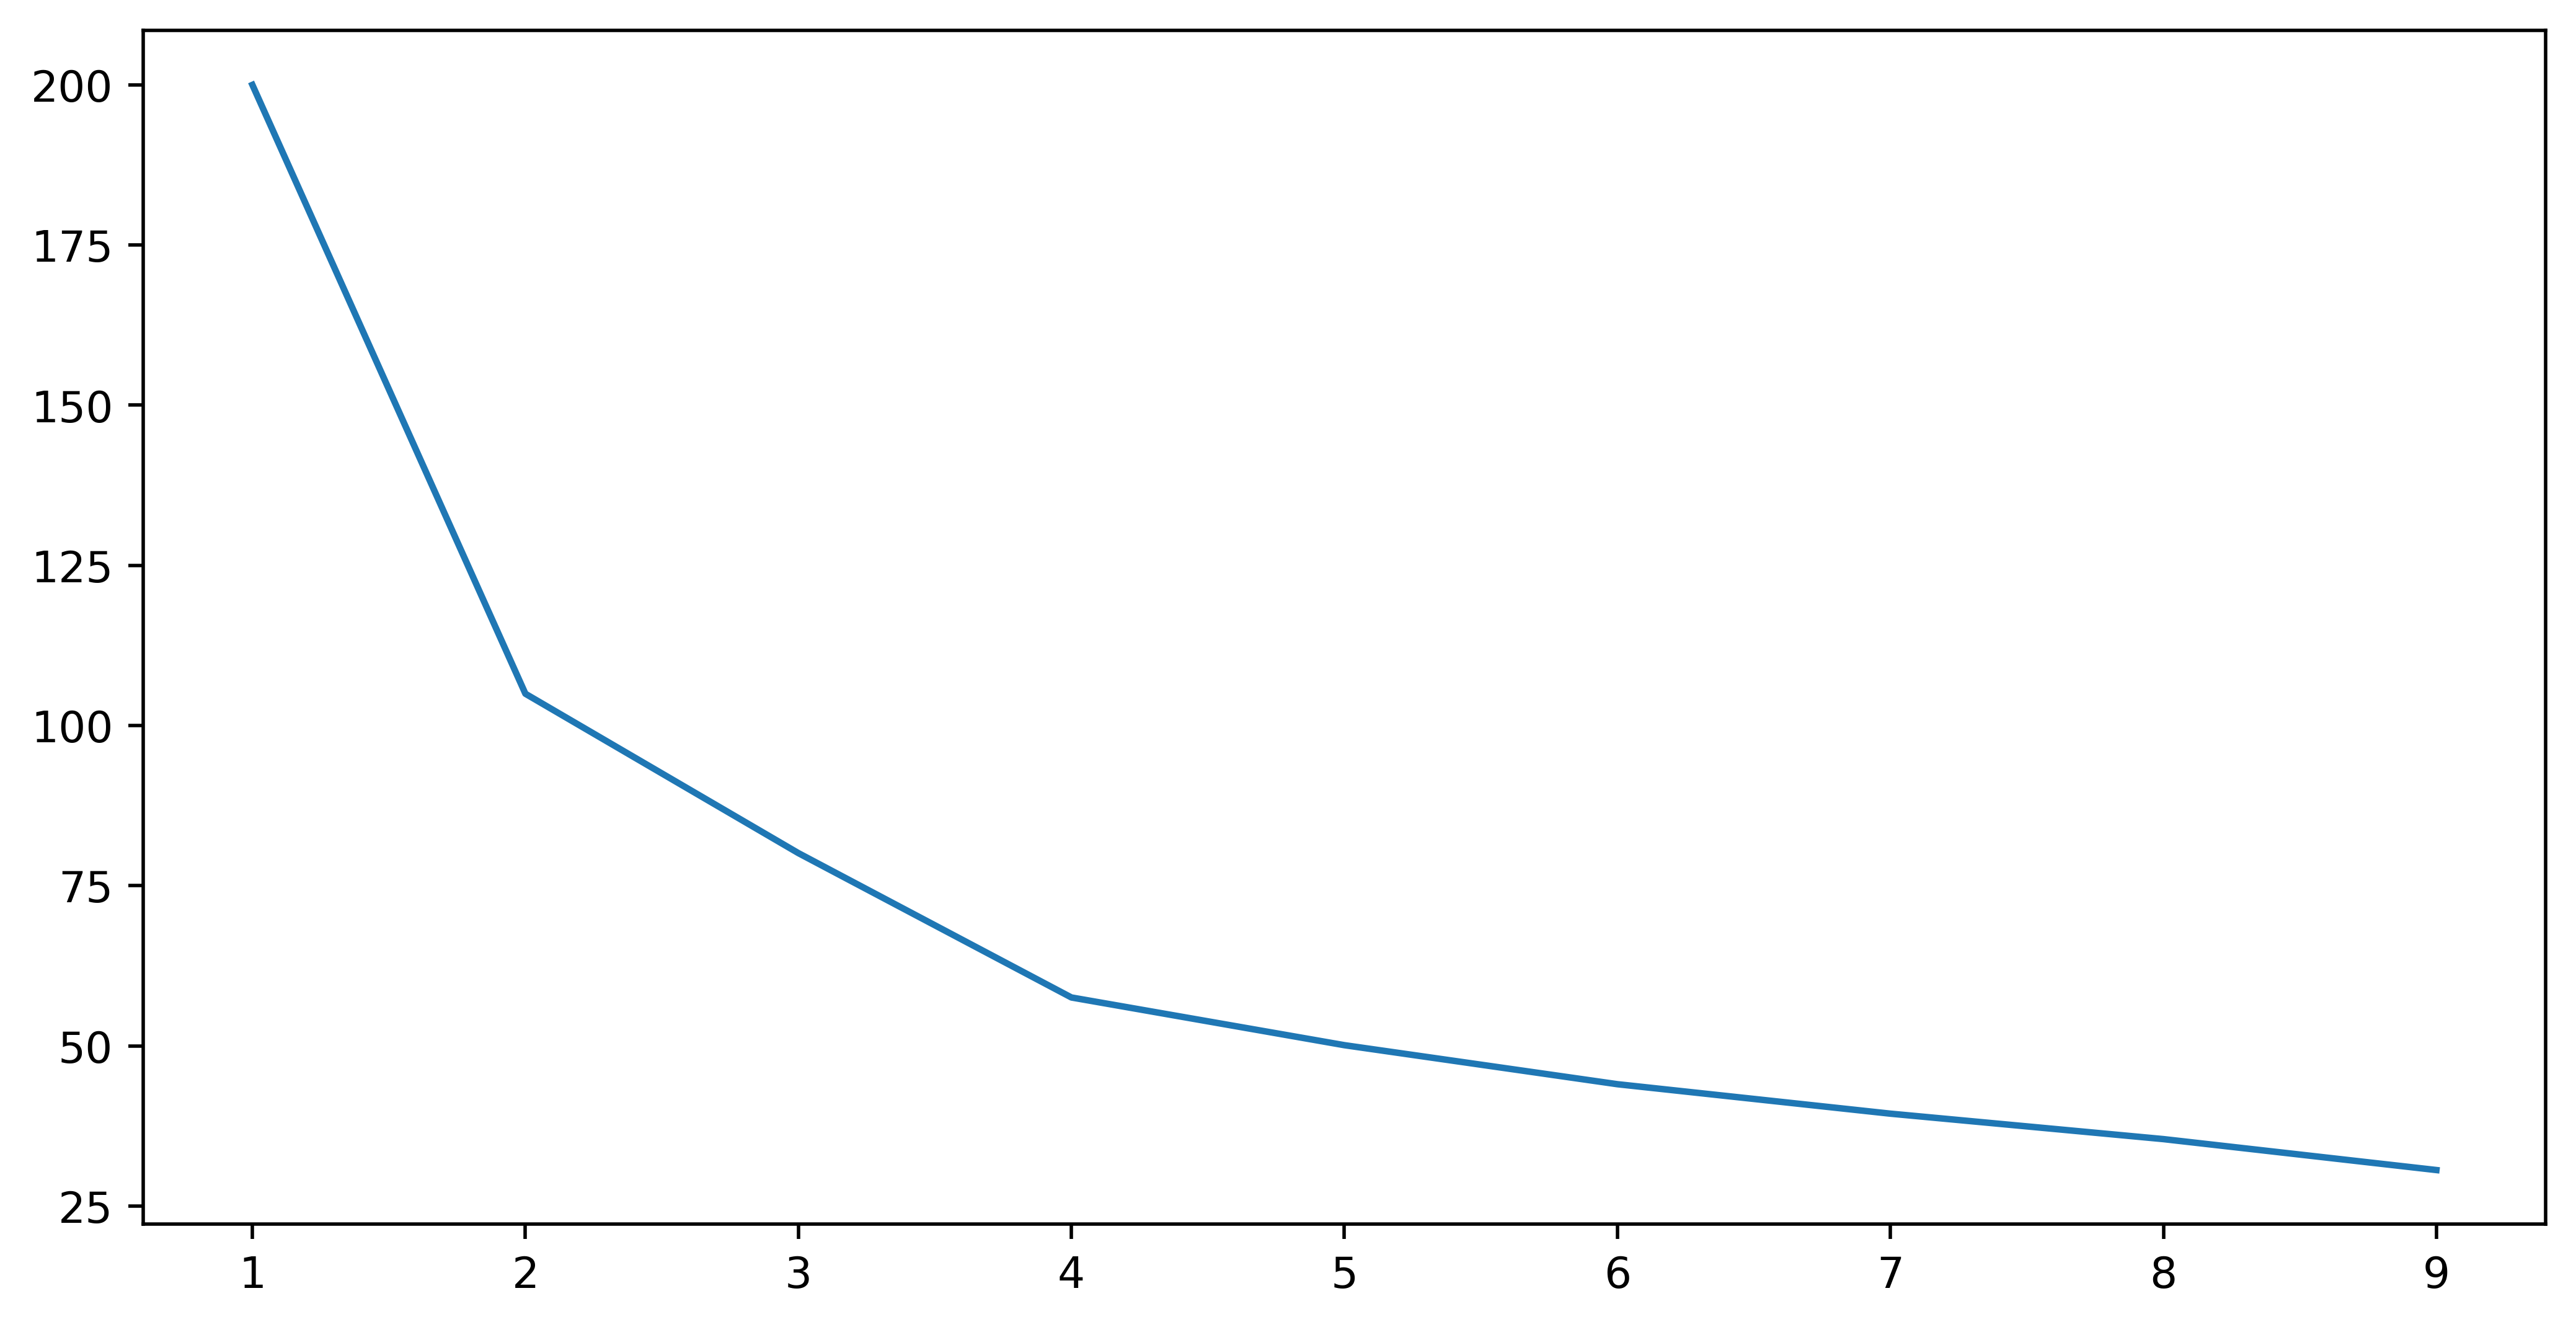

In [13]:
plt.plot(range(1,10), wcss)

In [14]:
km = KMeans(n_clusters=4)
final_ypred = km.fit_predict(x)
final_ypred

array([2, 1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 0, 1, 3, 0, 3, 0, 2, 0, 1, 3, 1,
       0, 2, 1, 0, 0, 1, 0, 3, 1, 1, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 3,
       0, 3, 3, 0, 0, 3])

In [15]:
silhouette_score(x,final_ypred)

0.33968891433344395

In [16]:
df["Clusters"] = final_ypred
df.head()

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1


In [17]:
df.groupby("Clusters").agg("mean")

,Murder,Assault,UrbanPop,Rape
Clusters,,,,
0,3.600000,78.538462,52.076923,12.176923
1,10.815385,257.384615,76.000000,33.192308
2,13.937500,243.625000,53.750000,21.412500
3,5.656250,138.875000,73.875000,18.781250
